<a href="https://colab.research.google.com/github/Gonzales-Franz-Reinaldo/SIS420-AI/blob/main/Laboratorios/LAB-02/LAB_02_Regresi%C3%B3n_Log%C3%ADstica_SIS420.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXAMEN DE LABORATORIO - Regresión Logística con Regularización

### Nombre: Gonzales Suyo Franz Reinaldo
### Carrera: Ing. de Sistemas
### C.U. 35-5335

## Implementacion del modelo de regresion logistica para realizar predicciones.

En este ejercicio se implementa regresion logistica y se aplica a dos diferentes datasets.

Nuestro objetuvo es predecir si un Equipo de la BNA pude ganar sus partidos de local.
En el siguiente dataset `games.csv` se encuentran todos los datos sobre el equipo realiza en el proceso del partido.

Link del Dataset: https://www.kaggle.com/datasets/husainsb/lendingclub-issued-loans?resource=download

Enlace del GitHub:
Link del Repositorio de GitHub LAB-04: https://github.com/Gonzales-Franz-Reinaldo/SIS420-AI/tree/main/Examen%20Laboratorio

In [1]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## **Información del Dataset**


**Temática:**  


**Variables de entrada:** 


In [8]:
# Cargar datos
# Las dos primeras columnas contienen la nota de dos examenes y la tercera columna
data = pd.read_csv('./lc_2016_2017procesd.csv', delimiter=',')



# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 80)  # Mostrar todas las filas (60 -> None)
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas (20 -> None)

# Mostramos los datos
data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,69802332,NaN,8400,8400,8400.0,36 months,11.99,278.97,C,C1,Accounting Manager,8 years,MORTGAGE,80000.0,Verified,Jan-2016,Current,n,NaN,debt_consolidation,Debt consolidation,302xx,GA,18.92,1,Aug-1998,1.0,23.0,59.0,31,2,11806.0,70.3,42,f,3627.88,3627.88,6141.250000,6141.25,4772.12,1369.13,0.0,0.0,0.0,Dec-2017,278.97,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,329237.0,3.0,1.0,3.0,4.0,157614.0,96.0,3.0,7.0,2881.0,94.0,16800.0,1.0,0.0,4.0
1,105668881,NaN,25000,25000,25000.0,36 months,11.49,824.29,B,B5,Registered Nurse,3 years,MORTGAGE,99000.0,Not Verified,Apr-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,722xx,AR,26.29,0,Oct-2006,0.0,NaN,NaN,11,0,24234.0,46.5,21,w,0.00,0.00,26560.060933,26560.06,25000.00,1560.06,0.0,0.0,0.0,Nov-2017,21630.28,NaN,Nov-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,272059.0,0.0,0.0,1.0,21.0,95306.0,NaN,1.0,2.0,11172.0,47.0,52100.0,0.0,3.0,0.0
2,92817326,NaN,8000,8000,8000.0,36 months,11.49,263.78,B,B5,Firman,10+ years,MORTGAGE,41000.0,Not Verified,Nov-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,465xx,IN,13.00,0,Aug-2003,0.0,NaN,NaN,7,0,7262.0,38.0,14,w,0.00,0.00,8254.881898,8254.88,8000.00,254.88,0.0,0.0,0.0,Feb-2017,7732.43,NaN,Sep-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,82895.0,1.0,1.0,1.0,5.0,16122.0,96.0,0.0,2.0,5096.0,65.0,19100.0,0.0,4.0,2.0
3,88016605,NaN,12000,12000,12000.0,36 months,11.49,395.66,B,B5,foreman,10+ years,RENT,48000.0,Verified,Aug-2016,Current,n,NaN,debt_consolidation,Debt consolidation,934xx,CA,29.20,0,Jul-2002,1.0,31.0,NaN,14,0,13508.0,56.0,21,w,7170.37,7170.37,6315.240000,6315.24,4829.63,1485.61,0.0,0.0,0.0,Dec-2017,395.66,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,31013.0,1.0,0.0,1.0,20.0,17505.0,60.0,2.0,4.0,2073.0,58.0,24100.0,0.0,0.0,1.0
4,92719338,NaN,10000,10000,10000.0,36 months,21.49,379.28,D,D5,Carpenter (dept. 252),< 1 year,RENT,51000.0,Source Verified,Nov-2016,Current,n,NaN,house,Home buying,064xx,CT,7.29,0,Jul-2013,3.0,NaN,NaN,4,0,414.0,7.7,5,f,7098.59,7098.59,4900.790000,4900.79,2901.41,1999.38,0.0,0.0,0.0,Dec-2017,379.28,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,0.0,13474.0,1.0,1.0,1.0,5.0,13060.0,94.0,2.0,3.0,264.0,70.0,5400.0,4.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,92541492,NaN,9250,9250,9250.0,36 months,13.99,316.10,C,C3,Tele-Outreach Specialist,< 1 year,RENT,35360.0,Source Verified,Nov-2016,Current,n,NaN,debt_consolidation,Debt consolidation,981xx,WA,29.63,0,Sep-2006,0.0,NaN,NaN,12,0,11069.0,39.4,30,w,6344.90,6344.90,4102.110000,4102.11,2905.10,1197.01,0.0,0.0,0.0,Dec-2017,316.10,Jan-2018,Dec-2017,0,NaN,1,Individual,NaN,NaN,NaN,0,318.0,36029.0,0.0,0.0,1.0,21.0,24960.0,66.0,0.0,1.0,3060.0,55.0,28100.0,1.0,1.0,0.0
49996,69058326,NaN,35000,35000,35000.0,60 months,20.50,937.06,E,E4,Plant Manger,10+ years,MORTGAGE,82000.

# **PREPARAMOS EL DATASET**

In [14]:
#Leemos el tipo de datos que tiene el dataset y vemos los datos faltantes
print('INFORMACION DE TIPO DE DATOS')
data.info()

INFORMACION DE TIPO DE DATOS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 72 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           50000 non-null  int64  
 1   member_id                    0 non-null      float64
 2   loan_amnt                    50000 non-null  int64  
 3   funded_amnt                  50000 non-null  int64  
 4   funded_amnt_inv              50000 non-null  float64
 5   term                         50000 non-null  object 
 6   int_rate                     50000 non-null  float64
 7   installment                  50000 non-null  float64
 8   grade                        50000 non-null  object 
 9   sub_grade                    50000 non-null  object 
 10  emp_title                    46630 non-null  object 
 11  emp_length                   46673 non-null  object 
 12  home_ownership               50000 non-null  

In [5]:
print('\nDATOS VACIOS')
print(pd.isnull(data).sum())


DATOS VACIOS
id                                 0
member_id                      50000
loan_amnt                          0
funded_amnt                        0
funded_amnt_inv                    0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                       3370
emp_length                      3327
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
desc                           50000
purpose                            0
title                           1561
zip_code                           0
addr_state                         0
dti                               24
delinq_2yrs                        0
earliest_cr_line                   0
inq_last_6mths          

Eliminamos las columnas que no aportan las siguientes características:

In [9]:
# Seleccionar las columnas que seran importantes para ell modelo
columnas_a_mantener = data.columns[:30]  # Seleccionar las primeras 30 columnas (0-29)

# Crear un nuevo DataFrame solo con las columnas a mantener
df = data[columnas_a_mantener]

df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc
0,69802332,NaN,8400,8400,8400.0,36 months,11.99,278.97,C,C1,Accounting Manager,8 years,MORTGAGE,80000.0,Verified,Jan-2016,Current,n,NaN,debt_consolidation,Debt consolidation,302xx,GA,18.92,1,Aug-1998,1.0,23.0,59.0,31
1,105668881,NaN,25000,25000,25000.0,36 months,11.49,824.29,B,B5,Registered Nurse,3 years,MORTGAGE,99000.0,Not Verified,Apr-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,722xx,AR,26.29,0,Oct-2006,0.0,NaN,NaN,11
2,92817326,NaN,8000,8000,8000.0,36 months,11.49,263.78,B,B5,Firman,10+ years,MORTGAGE,41000.0,Not Verified,Nov-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,465xx,IN,13.00,0,Aug-2003,0.0,NaN,NaN,7
3,88016605,NaN,12000,12000,12000.0,36 months,11.49,395.66,B,B5,foreman,10+ years,RENT,48000.0,Verified,Aug-2016,Current,n,NaN,debt_consolidation,Debt consolidation,934xx,CA,29.20,0,Jul-2002,1.0,31.0,NaN,14
4,92719338,NaN,10000,10000,10000.0,36 months,21.49,379.28,D,D5,Carpenter (dept. 252),< 1 year,RENT,51000.0,Source Verified,Nov-2016,Current,n,NaN,house,Home buying,064xx,CT,7.29,0,Jul-2013,3.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,92541492,NaN,9250,9250,9250.0,36 months,13.99,316.10,C,C3,Tele-Outreach Specialist,< 1 year,RENT,35360.0,Source Verified,Nov-2016,Current,n,NaN,debt_consolidation,Debt consolidation,981xx,WA,29.63,0,Sep-2006,0.0,NaN,NaN,12
49996,69058326,NaN,35000,35000,35000.0,60 months,20.50,937.06,E,E4,Plant Manger,10+ years,MORTGAGE,82000.0,Verified,Feb-2016,Current,n,NaN,debt_consolidation,NaN,898xx,NV,48.44,1,Feb-2000,2.0,17.0,NaN,15
49997,112733305,NaN,18000,18000,18000.0,36 months,12.62,603.21,C,C1,Community Manager,< 1 year,OWN,50000.0,Source Verified,Jul-2017,Current,n,NaN,debt_consolidation,Debt consolidation,480xx,MI,9.05,1,Apr-2011,1.0,5.0,NaN,17
49998,117041837,NaN,2400,2400,2400.0,36 months,23.88,94.01,E,E2,Forklift operator,10+ years,MORTGAGE,55000.0,Source Verified,Aug-2017,Current,n,NaN,debt_consolidation,Debt consolidation,397xx,MS,20.69,1,Apr-2006,0.0,5.0,NaN,4


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      50000 non-null  int64  
 1   member_id               0 non-null      float64
 2   loan_amnt               50000 non-null  int64  
 3   funded_amnt             50000 non-null  int64  
 4   funded_amnt_inv         50000 non-null  float64
 5   term                    50000 non-null  object 
 6   int_rate                50000 non-null  float64
 7   installment             50000 non-null  float64
 8   grade                   50000 non-null  object 
 9   sub_grade               50000 non-null  object 
 10  emp_title               46630 non-null  object 
 11  emp_length              46673 non-null  object 
 12  home_ownership          50000 non-null  object 
 13  annual_inc              50000 non-null  float64
 14  verification_status     50000 non-null

In [10]:
#Descartamos las columnas que tienen muchos datos perdidos o que no son muy necesarios para el analisis
df.drop(['member_id'], axis=1, inplace=True)
df.drop(['id'], axis=1, inplace=True)

C:\Users\gonza\AppData\Local\Temp\ipykernel_3820\2254285333.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['member_id'], axis=1, inplace=True)
C:\Users\gonza\AppData\Local\Temp\ipykernel_3820\2254285333.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['id'], axis=1, inplace=True)


In [11]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc
0,8400,8400,8400.0,36 months,11.99,278.97,C,C1,Accounting Manager,8 years,MORTGAGE,80000.0,Verified,Jan-2016,Current,n,NaN,debt_consolidation,Debt consolidation,302xx,GA,18.92,1,Aug-1998,1.0,23.0,59.0,31
1,25000,25000,25000.0,36 months,11.49,824.29,B,B5,Registered Nurse,3 years,MORTGAGE,99000.0,Not Verified,Apr-2017,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,722xx,AR,26.29,0,Oct-2006,0.0,NaN,NaN,11
2,8000,8000,8000.0,36 months,11.49,263.78,B,B5,Firman,10+ years,MORTGAGE,41000.0,Not Verified,Nov-2016,Fully Paid,n,NaN,debt_consolidation,Debt consolidation,465xx,IN,13.00,0,Aug-2003,0.0,NaN,NaN,7
3,12000,12000,12000.0,36 months,11.49,395.66,B,B5,foreman,10+ years,RENT,48000.0,Verified,Aug-2016,Current,n,NaN,debt_consolidation,Debt consolidation,934xx,CA,29.20,0,Jul-2002,1.0,31.0,NaN,14
4,10000,10000,10000.0,36 months,21.49,379.28,D,D5,Carpenter (dept. 252),< 1 year,RENT,51000.0,Source Verified,Nov-2016,Current,n,NaN,house,Home buying,064xx,CT,7.29,0,Jul-2013,3.0,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,9250,9250,9250.0,36 months,13.99,316.10,C,C3,Tele-Outreach Specialist,< 1 year,RENT,35360.0,Source Verified,Nov-2016,Current,n,NaN,debt_consolidation,Debt consolidation,981xx,WA,29.63,0,Sep-2006,0.0,NaN,NaN,12
49996,35000,35000,35000.0,60 months,20.50,937.06,E,E4,Plant Manger,10+ years,MORTGAGE,82000.0,Verified,Feb-2016,Current,n,NaN,debt_consolidation,NaN,898xx,NV,48.44,1,Feb-2000,2.0,17.0,NaN,15
49997,18000,18000,18000.0,36 months,12.62,603.21,C,C1,Community Manager,< 1 year,OWN,50000.0,Source Verified,Jul-2017,Current,n,NaN,debt_consolidation,Debt consolidation,480xx,MI,9.05,1,Apr-2011,1.0,5.0,NaN,17
49998,2400,2400,2400.0,36 months,23.88,94.01,E,E2,Forklift operator,10+ years,MORTGAGE,55000.0,Source Verified,Aug-2017,Current,n,NaN,debt_consolidation,Debt consolidation,397xx,MS,20.69,1,Apr-2006,0.0,5.0,NaN,4


In [12]:

df = df.sample(n=35000, random_state=42)

# mostramos el dataset reducido
df.shape

(35000, 28)

In [13]:
#labelEncoder sirve para convertir datos categoricos a numericos para poder hacer mejores calculos
from sklearn.preprocessing import LabelEncoder

#variables categoricas, donde convertimos a int64
columnas_categoricas = df.select_dtypes(include=['object']).columns

#Procesamiento de frases o palabras a valores numericos para su procesamiento
for columna in columnas_categoricas:
  le = LabelEncoder()
  df[columna] = le.fit_transform(df[columna])

In [14]:

print('\nDATOS VACIOS')
print(pd.isnull(df).sum())


DATOS VACIOS
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
desc                      35000
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                          19
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
mths_since_last_delinq    16728
mths_since_last_record    28525
open_acc                      0
dtype: int64


In [15]:
# Identificar columnas con valores nulos o vacíos
columnas_vacias = df.columns[df.isnull().any()].tolist()

# Eliminar columnas con valores nulos o vacíos
dataframe = df.drop(columnas_vacias, axis=1)

In [16]:
dataframe.shape

(35000, 24)

In [17]:
#Verificamos todos los datos del Dataset
print("\nDATOS VACIOS")
print(pd.isnull(dataframe).sum())


DATOS VACIOS
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
title                  0
zip_code               0
addr_state             0
delinq_2yrs            0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
dtype: int64


Una vez procesado los datos y preparados realizamos una copia del dataset para facilitar el uso del dataset

In [18]:
dataframe

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
33553,16000,16000,16000.0,1,12.74,361.93,2,10,10382,10,4,250000.0,2,6,1,0,1,2,835,46,0,395,0.0,13
9427,6000,6000,6000.0,0,9.75,192.90,1,7,11928,3,1,48000.0,2,11,0,0,3,6,360,16,0,140,2.0,14
199,15050,15050,15050.0,1,17.09,374.76,3,15,9349,1,4,41000.0,1,16,1,0,1,2,91,33,1,342,0.0,20
12447,20675,20675,20675.0,0,9.44,661.71,1,5,7891,1,1,54000.0,2,20,1,0,4,5,812,4,0,433,2.0,13
39489,11000,11000,11000.0,0,7.97,344.55,0,4,7648,0,4,60000.0,0,12,1,0,1,2,768,4,0,544,0.0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38991,24000,24000,24000.0,1,10.49,515.74,1,6,11576,7,1,300000.0,2,8,1,0,1,2,292,9,1,238,0.0,25
30498,5000,5000,5000.0,0,12.62,167.56,2,10,10385,2,3,42000.0,0,10,1,0,2,3,758,32,0,448,1.0,8
37862,14000,14000,14000.0,0,11.47,461.47,1,9,1903,1,4,55000.0,1,11,1,0,1,2,764,4,0,579,0.0,11
17659,6000,6000,6000.0,0,13.49,203.59,2,11,10830,6,4,23000.0,1,6,1,0,2,3,112,33,0,592,0.0,8


Transformamos la columna loan_status en 0 y 1 binaria

In [19]:
# Generamos una nueva columna llamada 'Content_Rating' con valores aleatorios entre 0 y 1
dataframe['loan_status'] = np.random.randint(2, size=len(dataframe))

In [20]:
dataframe['loan_status'].value_counts()

loan_status
1    17577
0    17423
Name: count, dtype: int64

In [21]:
#Movimiento de columna al final del dataset y verificacion de datos
# En este caso movemos nuestra Y predicha al final de las columnas que en este caso es "Install"
indice_columna = dataframe.columns.get_loc('loan_status')
columnas = list(dataframe.columns)
columnas.pop(indice_columna)
columnas.append('loan_status')
dataframe = dataframe[columnas]

# Verificamos el dataset
dataframe.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,loan_status
33553,16000,16000,16000.0,1,12.74,361.93,2,10,10382,10,4,250000.0,2,6,0,1,2,835,46,0,395,0.0,13,0
9427,6000,6000,6000.0,0,9.75,192.90,1,7,11928,3,1,48000.0,2,11,0,3,6,360,16,0,140,2.0,14,1
199,15050,15050,15050.0,1,17.09,374.76,3,15,9349,1,4,41000.0,1,16,0,1,2,91,33,1,342,0.0,20,1
12447,20675,20675,20675.0,0,9.44,661.71,1,5,7891,1,1,54000.0,2,20,0,4,5,812,4,0,433,2.0,13,0
39489,11000,11000,11000.0,0,7.97,344.55,0,4,7648,0,4,60000.0,0,12,0,1,2,768,4,0,544,0.0,16,1


In [22]:
# # Guardamos una copia del dataset preparado
dataframe.to_csv('../Examen Laboratorio/lc_2016_2017.csv', index=False)

# 1 Regresion Logistica

## Contexto del dataset


## #Acerca del conjunto de datos

#### Contexto

Estos son los datos completos de préstamos de LendingClub para todos los préstamos emitidos durante el período de tiempo indicado en el área de EE. UU.


#### Contenido

El conjunto de entrenamiento consta de datos de préstamos de 2007 a 2015 y el conjunto de datos de prueba contiene datos de préstamos de 2016 a 2017.
Se han proporcionado códigos estatales de EE. UU. con su nombre completo para la creación de mapas.


Agradecimientos

Los datos de los préstamos se han adquirido del sitio web oficial de LendingClub y de los códigos estatales de EE. UU. y sus nombres se han adquirido de Wikipedia.


#### Inspiración


Puede analizar los datos y obtener información sobre los préstamos emitidos hasta la fecha.


Predecir qué préstamo incumplirá con los pagos.

Análisis de texto y sentimiento

Análisis de series temporales

## **Dividimos el dataset para diferentes pruebas **

Dividimos los datos donde el 80% de los datos del dataset seran para el entrenamiento del modelo, mientras que el 20% restante del dataset sera usando para hacer las pruebas y validaciones correspondientes.

In [23]:
# Leemos los datos del dataset
data_ = pd.read_csv('./lc_2016_2017.csv', delimiter=',')

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data, test_data = train_test_split(data_, test_size=0.2, random_state=42)

# Dividimos los datos para X_test y y_test donde seran los datos para el prueba 
X_test = test_data.drop(['loan_status'], axis=1)
y_test = test_data['loan_status']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train = train_data.drop(['loan_status'], axis=1)
y_train = train_data['loan_status']
m_train = len(y_train)


# Mostramos los datos que seran para el entrenamiento
print("Datos de X_train:")
print(X_train)
print('-' * 100)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 80)
print("El 80% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 20% de ejemplos que seran para el entrenamiento son: {:.0f}".format(len(test_data)))

Datos de X_train:
       loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
18788      32000        32000          32000.0     1     13.99       744.42   
776        18500        18500          18500.0     0      9.49       592.53   
480         8500         8500           8500.0     0      8.59       268.68   
30078      25000        25000          25000.0     0     14.46       860.04   
29115      10000        10000          10000.0     1     13.49       230.05   
...          ...          ...              ...   ...       ...          ...   
16850      26325        26325          26325.0     0     13.99       899.60   
6265        5000         5000           5000.0     0     15.59       174.78   
11284      17000        17000          17000.0     1     18.06       432.25   
860         7725         7725           7725.0     0     11.47       254.63   
15795      40000        40000          40000.0     1     10.49       859.56   

       grade  sub_grade  emp_titl

In [24]:
data_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            35000 non-null  int64  
 1   funded_amnt          35000 non-null  int64  
 2   funded_amnt_inv      35000 non-null  float64
 3   term                 35000 non-null  int64  
 4   int_rate             35000 non-null  float64
 5   installment          35000 non-null  float64
 6   grade                35000 non-null  int64  
 7   sub_grade            35000 non-null  int64  
 8   emp_title            35000 non-null  int64  
 9   emp_length           35000 non-null  int64  
 10  home_ownership       35000 non-null  int64  
 11  annual_inc           35000 non-null  float64
 12  verification_status  35000 non-null  int64  
 13  issue_d              35000 non-null  int64  
 14  pymnt_plan           35000 non-null  int64  
 15  purpose              35000 non-null 

## 1.1 **Visualizar los datos en la gráfica**

In [25]:
import matplotlib.pyplot as plt

def plotData(X, y):
  # Gragica los puntos de datos X y y en una nueva figura. Grafica los puntos de datos con * para los positivos y
  # o para los negativos.

  # Crear una nueva figura
  fig = plt.figure()

  # Encontrar indices de positivos y negativos
  pos = y == 1
  neg = y == 0

  plt.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
  plt.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)


# **1.2 IMPLEMENTACIÓN**

## **1.2.1 Normalización de los datos:**

Al visualizar los datos se puede observar que las caracteristicas tienen diferentes magnitudes, por lo cual se debe transformar cada valor en una escala de valores similares, esto con el fin de que el descenso por el gradiente pueda converger mas rapidamente. Se aplica la normalizacion esto debido a que los datos de las X estan a diferentes escalas.

Hacemos el uso de la siguiente funcion para normalizar los datos de las columnas X:

In [26]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [27]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm, mu, sigma = featureNormalize(X_train)

In [28]:
# Mostramos la media de cada caracteristica de X_train y la desviacion estandar de cada caracteristica
print('Media de cada caracteristica de X_train:')
print(mu)
print('-' * 80)
print('Desviacion estandar de cada caracteristica de X_train:')
print(sigma)

Media de cada caracteristica de X_train:
loan_amnt              14780.435714
funded_amnt            14780.435714
funded_amnt_inv        14774.975860
term                       0.263964
int_rate                  13.176009
installment              444.083101
grade                      1.691964
sub_grade                 10.399929
emp_title               7932.358286
emp_length                 4.035714
home_ownership             2.400679
annual_inc             79498.178144
verification_status        0.948571
issue_d                   10.005821
pymnt_plan                 0.000893
purpose                    2.575179
title                      3.978321
zip_code                 435.130286
addr_state                22.599929
delinq_2yrs                0.354250
earliest_cr_line         314.048607
inq_last_6mths             0.536786
open_acc                  11.828393
dtype: float64
--------------------------------------------------------------------------------
Desviacion estandar de cada caracte

In [29]:
# Mostramos los datos normalizados
X_norm

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
18788,1.877935,1.877935,1.878990,1.669848,0.161121,1.099870,0.251876,0.259493,-1.636288,-0.840610,-0.990148,0.772757,0.066331,1.326101,-0.029894,-0.273944,-0.362510,0.969210,1.331653,0.691024,1.216829,1.751912,0.550370
776,0.405649,0.405649,0.406344,-0.598857,-0.729607,0.543630,-0.565808,-0.713562,-0.064495,0.267017,-0.990148,-0.153665,-1.223438,-1.328033,-0.029894,-0.750219,-0.733053,-0.871711,1.468936,0.691024,1.001713,-0.642696,-0.317282
480,-0.684933,-0.684933,-0.684505,-0.598857,-0.907752,-0.642347,-1.383491,-1.037914,0.679895,0.267017,1.130570,-0.500967,0.066331,1.326101,-0.029894,-0.273944,-0.362510,0.980573,-1.208088,1.761136,-0.764503,-0.642696,-1.011404
30078,1.114528,1.114528,1.115395,-0.598857,0.254153,1.523284,0.251876,0.421669,1.004687,-0.840610,1.130570,0.433097,1.356100,0.164918,-0.029894,-0.273944,-0.362510,-0.360344,1.263011,0.691024,-0.713555,2.949216,0.029779
29115,-0.521346,-0.521346,-0.520878,1.669848,0.062151,-0.783815,0.251876,0.097317,0.182501,-1.117517,-0.990148,-0.263205,0.066331,1.326101,-0.029894,-0.750219,-0.733053,0.700269,-1.414013,-0.379087,1.001713,-0.642696,0.203310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,1.259030,1.259030,1.259933,-0.598857,0.161121,1.668158,0.251876,0.259493,-1.090810,-0.840610,-0.990148,0.093437,1.356100,0.994335,-0.029894,-0.750219,-0.733053,-0.568679,-0.933521,2.831247,-1.064533,0.554608,-0.143751
6265,-1.066637,-1.066637,-1.066302,-0.598857,0.477824,-0.986220,0.251876,0.583845,-0.264542,-0.840610,0.423664,0.518012,0.066331,1.326101,-0.029894,-0.750219,-0.733053,1.139665,-1.345371,1.761136,-1.557036,-0.642696,1.244492
11284,0.242062,0.242062,0.242716,1.669848,0.966735,-0.043334,1.069559,0.908197,-0.636283,-0.840610,-0.990148,-0.585882,0.066331,1.657868,-0.029894,-0.273944,-0.362510,0.181326,-0.041180,-0.379087,0.401652,-0.642696,-0.664343
860,-0.769453,-0.769453,-0.769046,-0.598857,-0.337687,-0.693800,-0.565808,-0.227035,0.035755,1.651551,1.130570,-1.037086,0.066331,0.496684,-0.029894,-0.273944,-0.362510,-1.038379,0.988445,-0.379087,1.035678,-0.642696,-1.358465


Agregamos la columna de unos (1) en X_train para completar los valores para theta 0

In [30]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m, n = X_train.shape

# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

## **1.3 FUNCIÓN SIGMOIDEA**

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1.
Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [31]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [41]:
print(sigmoid(0))

# Prueba la implementación de la funcion sigmoidea
z = [0, 0.5, 1]
g = sigmoid(z)

print('g(', z, ') = ', g)

0.5
g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


## **1.2.2 FUNCIÓN DE COSTO Y GRADIENTE**

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

## **Cálculo del costo  J(θ)**

In [32]:
# La funcion de costo en una regresión logistica es:
def calcularCosto(theta, X, y):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))

  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

  return J

## Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

Creamos la funcion para calcular el descenso por la gradiente y obtener un theta y J_historico. haciendo uso de la **sigmoid()**

In [33]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradiente(theta, X, y, alpha, num_iters):
  m = y.shape[0]

  # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
  theta = theta.copy()
  J_history = []

  for i in range(num_iters):
    h = sigmoid(X.dot(theta.T))
    theta = theta - (alpha / m) * (h - y).dot(X)

    J_history.append(calcularCosto(theta, X, y))
  return theta, J_history

Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

In [35]:
X_ready.shape

(28000, 24)

thetas calculados por el descenso por el gradiente: [ 0.00782665 -0.00328959 -0.00328959 -0.00325696 -0.00614391  0.00270876
 -0.00204602  0.00342501  0.00288552 -0.02281956  0.00845822 -0.00157388
 -0.00443319  0.00690617  0.0038623  -0.02976305  0.00776599 -0.0180809
  0.01082967  0.00025017  0.00113122 -0.00014822 -0.01606074  0.006505  ]
Con un costo de: 0.6927906329778046 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

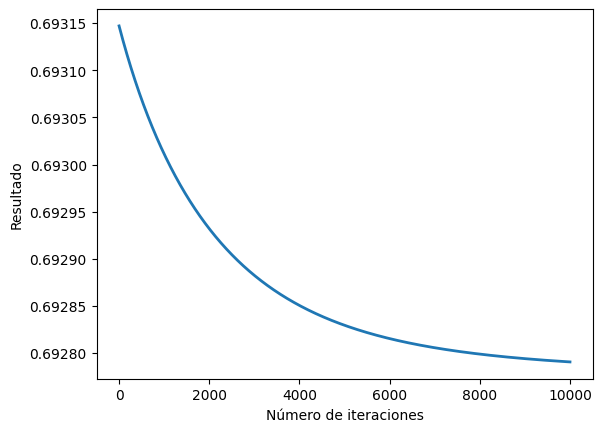

In [36]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(24)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta)))
print('=' * 100)
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history[-1]} ")



print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

Realizando algunas pruebas de que el equipo gana o no en un partido de local.

In [37]:
X_train

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
18788,32000,32000,32000.0,1,13.99,744.42,2,12,718,1,1,125000.0,1,18,0,2,3,691,42,1,529,2.0,15
776,18500,18500,18500.0,0,9.49,592.53,1,6,7648,5,1,70450.0,0,2,0,1,2,205,44,1,491,0.0,10
480,8500,8500,8500.0,0,8.59,268.68,0,4,10930,5,4,50000.0,1,18,0,2,3,694,5,2,179,0.0,6
30078,25000,25000,25000.0,0,14.46,860.04,2,13,12362,1,4,105000.0,2,11,0,2,3,340,41,1,188,3.0,12
29115,10000,10000,10000.0,1,13.49,230.05,2,11,8737,0,1,64000.0,1,18,0,1,2,620,2,0,491,0.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,26325,26325,26325.0,0,13.99,899.60,2,12,3123,1,1,85000.0,2,16,0,1,2,285,9,3,126,1.0,11
6265,5000,5000,5000.0,0,15.59,174.78,2,14,6766,1,3,110000.0,1,18,0,1,2,736,3,2,39,0.0,19
11284,17000,17000,17000.0,1,18.06,432.25,3,16,5127,1,1,45000.0,1,20,0,2,3,483,22,0,385,0.0,8
860,7725,7725,7725.0,0,11.47,254.63,1,9,8090,10,4,18432.0,1,13,0,2,3,161,37,0,497,0.0,4


In [38]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 18500,	18500,	18500.0,	0,	9.49,	592.53,	1,	6,	7648,	5,	1,	70450.0,	0,	2,	0,	1,	2,	205,	44,	1,	491,	0.0,	10]
resuldato = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f"Préstamos emitidos por LendingClub con las siguientes datos: {X_array}")
print('Préstamos emitidos por LendingClub tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

Préstamos emitidos por LendingClub con las siguientes datos: [1, 18500, 18500, 18500.0, 0, 9.49, 592.53, 1, 6, 7648, 5, 1, 70450.0, 0, 2, 0, 1, 2, 205, 44, 1, 491, 0.0, 10]
Préstamos emitidos por LendingClub tiene como probabilidad de ganar el partido de local: 0


## **Ejemplos de Predicciones y Validaciones**

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

####  Definiendo nuestro umbral clasificador
Donde:

* Si $h(\theta)$ >= 0.5, predice "y = 1".
* Si $h(\theta)$ < 0.5 , predice "y = 0".

In [39]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm = (X_test - mu) / sigma
m_test = len(X_test)

Concatenamos con la columna de unos (1) al data frame de X_test normalizado.

In [40]:
X_test_ready = np.concatenate([np.ones((m_test, 1)), X_test_norm], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready)

[[ 1.         -0.73946243 -0.73946243 ...  0.41297401 -0.64269567
  -0.1437514 ]
 [ 1.         -0.54315759 -0.54315759 ... -1.22303984 -0.64269567
  -1.53199514]
 [ 1.         -0.30322944 -0.30322944 ...  1.54516353 -0.64269567
  -0.6643428 ]
 ...
 [ 1.          0.0239453   0.0239453  ...  0.71300423 -0.64269567
  -0.31728187]
 [ 1.          0.22025014  0.22025014 ...  0.70168234 -0.64269567
  -0.49081234]
 [ 1.          0.0239453   0.0239453  ...  0.39599117 -0.64269567
  -1.01140374]]


Realizamos el cálculo de los resultados de Y predicha

In [41]:
X_test_ready.shape

(7000, 24)

In [53]:
# inicializamos nuestra y_predicha donde almacenaremos nuestras y predichas
y_predicha = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready:
  y_predicha.append(sigmoid(np.dot(i, theta)))


y_predicha = np.array(y_predicha)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral = (y_predicha >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}{:>8s}".format(
    'X[:, 0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]',
    'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]', ' Y_predicha', ' Y_umbral'
))

print("=" * 155)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12],
        X_test_ready[i, 13], X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20], X_test_ready[i, 21], X_test_ready[i, 22], X_test_ready[i, 23],    y_predicha[i], y_umbral[i]
))


 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]X[:, 18]X[:, 19]  X[:, 20]  X[:, 21]X[:, 22]X[:, 23] Y_predicha Y_umbral
   1.000  -0.739    -0.739    -0.739  -0.599  -1.153  -0.717  -1.383-1.200    -0.031     1.652    -0.990     0.348    -1.223     1.658    -0.030   0.202   0.749 0.878     1.332    -0.379     0.413    -0.643    -0.144     0.507     1.000
   1.000  -0.543    -0.543    -0.543  -0.599   0.062  -0.409   0.252 0.097    -1.015    -1.118     1.131    -0.467     0.066     1.492    -0.030  -0.750  -0.733-1.304     0.714    -0.379    -1.223    -0.643    -1.532     0.508     1.000
   1.000  -0.303    -0.303    -0.303   1.670   0.161  -0.604   0.252 0.259     0.840     1.375    -0.990    -0.501     0.066    -0.167    -0.030  -0.274  -0.363-1.572     0.439    -0.379     1.545    -0.643    -0.664     0.498     0.000
   1.000  -1.230    -1.230    -1.230  -0.599  -0.08

## Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [54]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral == y_test) * 100))

Precición de entrenamiento: 50.43 % 


# **- Conclución**

Segun los resultados tanto de predicciones y la precición del entranamiento es de un 92.52 % lo que indica que esta por superior a los 50% casi por poco de los 100%.
Por lo que podemos decir que el modelo es muy preciso en las predicciones de que el Préstamos emitidos por LendingClub los pagos, esto demuestra que la precición sea muy alta de la probabilidad los impuestos se realicen.

## =======================================================================================================

# **Regresión Logistica con Regularización**

In [55]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

import pandas as pd

# Modulo de optimización de scipy
from scipy import optimize

#Para separa el Dataset 20% y 80% para diferentes pruebas
from sklearn.model_selection import train_test_split

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [56]:
# Leemos los datos del dataset
df = pd.read_csv('./lc_2016_2017.csv', delimiter=',')

# Aplicando la libreria, separamos los datos del 80% y 20% del Dataset
train_data_reg, test_data_reg = train_test_split(df, test_size=0.2, random_state=42)

# Dividimos los datos para X_test_reg y y_test donde seran los datos para el prueba 
X_test_reg = test_data_reg.drop(['loan_status'], axis=1)
y_test_reg = test_data_reg['loan_status']

# Dividimos los datos para X_train y y_train donde seran los datos para el entrenamiento
X_train_reg = train_data_reg.drop(['loan_status'], axis=1)
y_train_reg = train_data_reg['loan_status']
m_train = len(y_train_reg)

### 1.2 Normalización de los datos:

In [57]:
# Defenimos la funcion de normalizacion de datos
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)

    sigma[sigma == 0] = 1  # verificar

    #normalizamos los datos con la siguiente formula
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [58]:
# Llamamos a la funcion de normalización para normalizar los datos de X_train
X_norm_reg, mu_reg, sigma_reg = featureNormalize(X_train_reg)
X_norm_reg

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc
18788,1.877935,1.877935,1.878990,1.669848,0.161121,1.099870,0.251876,0.259493,-1.636288,-0.840610,-0.990148,0.772757,0.066331,1.326101,-0.029894,-0.273944,-0.362510,0.969210,1.331653,0.691024,1.216829,1.751912,0.550370
776,0.405649,0.405649,0.406344,-0.598857,-0.729607,0.543630,-0.565808,-0.713562,-0.064495,0.267017,-0.990148,-0.153665,-1.223438,-1.328033,-0.029894,-0.750219,-0.733053,-0.871711,1.468936,0.691024,1.001713,-0.642696,-0.317282
480,-0.684933,-0.684933,-0.684505,-0.598857,-0.907752,-0.642347,-1.383491,-1.037914,0.679895,0.267017,1.130570,-0.500967,0.066331,1.326101,-0.029894,-0.273944,-0.362510,0.980573,-1.208088,1.761136,-0.764503,-0.642696,-1.011404
30078,1.114528,1.114528,1.115395,-0.598857,0.254153,1.523284,0.251876,0.421669,1.004687,-0.840610,1.130570,0.433097,1.356100,0.164918,-0.029894,-0.273944,-0.362510,-0.360344,1.263011,0.691024,-0.713555,2.949216,0.029779
29115,-0.521346,-0.521346,-0.520878,1.669848,0.062151,-0.783815,0.251876,0.097317,0.182501,-1.117517,-0.990148,-0.263205,0.066331,1.326101,-0.029894,-0.750219,-0.733053,0.700269,-1.414013,-0.379087,1.001713,-0.642696,0.203310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,1.259030,1.259030,1.259933,-0.598857,0.161121,1.668158,0.251876,0.259493,-1.090810,-0.840610,-0.990148,0.093437,1.356100,0.994335,-0.029894,-0.750219,-0.733053,-0.568679,-0.933521,2.831247,-1.064533,0.554608,-0.143751
6265,-1.066637,-1.066637,-1.066302,-0.598857,0.477824,-0.986220,0.251876,0.583845,-0.264542,-0.840610,0.423664,0.518012,0.066331,1.326101,-0.029894,-0.750219,-0.733053,1.139665,-1.345371,1.761136,-1.557036,-0.642696,1.244492
11284,0.242062,0.242062,0.242716,1.669848,0.966735,-0.043334,1.069559,0.908197,-0.636283,-0.840610,-0.990148,-0.585882,0.066331,1.657868,-0.029894,-0.273944,-0.362510,0.181326,-0.041180,-0.379087,0.401652,-0.642696,-0.664343
860,-0.769453,-0.769453,-0.769046,-0.598857,-0.337687,-0.693800,-0.565808,-0.227035,0.035755,1.651551,1.130570,-1.037086,0.066331,0.496684,-0.029894,-0.273944,-0.362510,-1.038379,0.988445,-0.379087,1.035678,-0.642696,-1.358465


Agregamos la columna de unos (1) en X_train para completar los valores para theta 0

In [59]:
# Antes de continuar es importante agregar el termino de intercepcion a X.
# Agregamos la columna de 1
m_reg, n_reg = X_train_reg.shape

# Agraga el termino de intercepción a A
X_ready_reg = np.concatenate([np.ones((m_reg, 1)), X_norm_reg], axis=1)

# Mostramos los datos
X_ready_reg

array([[ 1.        ,  1.87793549,  1.87793549, ...,  1.21682857,
         1.75191229,  0.55037047],
       [ 1.        ,  0.40564916,  0.40564916, ...,  1.00171256,
        -0.64269567, -0.31728187],
       [ 1.        , -0.68493331, -0.68493331, ..., -0.76450309,
        -0.64269567, -1.01140374],
       ...,
       [ 1.        ,  0.24206179,  0.24206179, ...,  0.40165212,
        -0.64269567, -0.6643428 ],
       [ 1.        , -0.76945345, -0.76945345, ...,  1.03567825,
        -0.64269567, -1.35846467],
       [ 1.        ,  2.75040147,  2.75040147, ..., -1.3249369 ,
         0.55460831, -0.6643428 ]])

## 1.3 FUNCIÓN SIGMOIDEA

La función sigmoidea o tambien llamada función de logistica, nos permite calcaluar o predecir una probabilidad de un hecho que de 0 a 1. Donde z es la transpues de theta por X, que es nuestra hipótesis.

In [60]:
# Defenimos la función sigmoidea o funcion logistica que calcula la hipotesis ho(x)
def sigmoid(z):
  # Calcula la sigmoidea de una entrada z
  # convierte la entrada a un arreglo numpy
  z = np.array(z)
  g = np.zeros(z.shape)

  g = 1 / (1 + np.exp(-z))

  return g

## 1.2.2 FUNCIÓN DE COSTO Y GRADIENTE

Se implementa la funcion cost y gradient, para la regresión logistica, donde hace el uso de la funcion de Sigmoid para calular.

### Cálculo del costo J(θ)

In [61]:
# La funcion de costo en una regresión logistica es:
def calcularCostoReg(theta, X, y, lambda_reg):
  m = y.size # numeros de ejemplos de entrenamiento

  J = 0
  h = sigmoid(X.dot(theta.T))
  
  # Término de regularización 
  theta_reg = theta.copy()
  theta_reg[0] = 0  # No regularizar el termino de sesgo

  J = - (1 / m) * np.sum(y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(np.square(theta_reg))
  # J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_reg / (2 * m)) * np.sum(np.square(theta_reg))

  return J

### Descenso por el gradiente

In [62]:
# Defenimos la funcion del Descenso por el gradiente
def descensoGradienteReg(theta, X, y, alpha, num_iters, lambda_reg):
    m = y.shape[0]
    
    # realizar una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))

        # Actualizar theta_0 (término de sesgo)
        theta[0] = theta[0] - (alpha / m) * np.sum((h - y) * X[:, 0])

        # Actualizar theta_j (j = 1, 2, ..., n)
        for j in range(1, X.shape[1]):
            theta[j] = theta[j] - alpha * ((1 / m) * np.sum((h - y) * X[:, j]) + (lambda_reg / m) * theta[j])

        J_history.append(calcularCostoReg(theta, X, y, lambda_reg))

    return theta, J_history

Probamos con algunos alternativas, donde los thetas se inicializan con Cero (0) y con una taza de aprendizaje alpha por lo que hacemos pruebas con diferentes valores.

In [63]:
X_ready_reg.shape

(28000, 24)

thetas calculados por el descenso por el gradiente: [ 0.00830146 -0.0032549  -0.0032549  -0.00320495 -0.00690888  0.00269081
 -0.00225064  0.00389044  0.00307718 -0.0245121   0.009644   -0.00226792
 -0.00474705  0.0073536   0.00403893 -0.03238832  0.01093879 -0.02134691
  0.01163313  0.00055146  0.00121643 -0.00019372 -0.01757522  0.00750311]
Con un costo de: 0.6927827194970417 
GRÁFICA DE LA CONVERGENCIA DEL COSTO


Text(0, 0.5, 'Resultado')

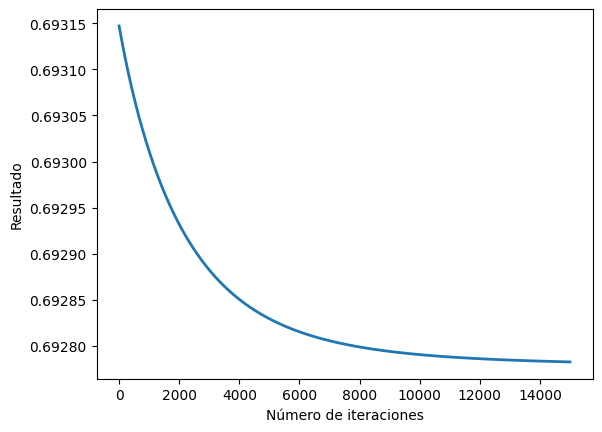

In [64]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha_reg = 0.001
num_iters = 15000
lambda_reg = 0.01

# Inicializa theta_reg y ejecuta el descenso por el gradiente
theta_reg = np.zeros(24)
theta_reg, J_history_reg = descensoGradienteReg(theta_reg, X_ready_reg, y_train_reg, alpha_reg, num_iters, lambda_reg)

# Muestra los resultados del descenso del gradiente
print('thetas calculados por el descenso por el gradiente: {:s}'.format(str(theta_reg)))
print('=' * 100)
#mostramos el ultimo costo, este seria el mejor costo
print(f"Con un costo de: { J_history_reg[-1]} ")



print("GRÁFICA DE LA CONVERGENCIA DEL COSTO")
# Grafica de la convergencia del resultado de los partidos
plt.plot(np.arange(len(J_history_reg)), J_history_reg, lw=2)
plt.xlabel('Número de iteraciones')
plt.ylabel('Resultado')

Realizando algunas pruebas de que el equipo gana o no en un partido de local.

In [65]:
# Realizando algunas pruebas de que el equipo gana o no en un partido de local

X_array = [1, 18500,	18500,	18500.0,	0,	9.49,	592.53,	1,	6,	7648,	5,	1,	70450.0,	0,	2,	0,	1,	2,	205,	44,	1,	491,	0.0,	10]
resuldato = sigmoid(np.dot(X_array, theta_reg))   # Se debe cambiar esto

print(f"Préstamos emitidos por LendingClub con las siguientes datos: {X_array}")
print('Préstamos emitidos por LendingClub tiene como probabilidad de ganar el partido de local: {:.0f}'.format(resuldato))

Préstamos emitidos por LendingClub con las siguientes datos: [1, 18500, 18500, 18500.0, 0, 9.49, 592.53, 1, 6, 7648, 5, 1, 70450.0, 0, 2, 0, 1, 2, 205, 44, 1, 491, 0.0, 10]
Préstamos emitidos por LendingClub tiene como probabilidad de ganar el partido de local: 0


## Predicciones y Validaciones con datos de prueba

Para las validaciones correspondientes se hizo el uso del 80% y 20%, donde el 80% son para el entrenamiento y el 20% para la fase de prueba.

In [66]:
# Aplicamos con el data de X_test que es el 20$% para la prueba
# Normalizamos el X_test
X_test_norm_reg = (X_test_reg - mu_reg) / sigma_reg
m_test = len(X_test_reg)

In [67]:
X_test_ready_reg = np.concatenate([np.ones((m_test, 1)), X_test_norm_reg], axis=1)

# Mostramos los datos del X_test ya normalizados
print(X_test_ready_reg)

[[ 1.         -0.73946243 -0.73946243 ...  0.41297401 -0.64269567
  -0.1437514 ]
 [ 1.         -0.54315759 -0.54315759 ... -1.22303984 -0.64269567
  -1.53199514]
 [ 1.         -0.30322944 -0.30322944 ...  1.54516353 -0.64269567
  -0.6643428 ]
 ...
 [ 1.          0.0239453   0.0239453  ...  0.71300423 -0.64269567
  -0.31728187]
 [ 1.          0.22025014  0.22025014 ...  0.70168234 -0.64269567
  -0.49081234]
 [ 1.          0.0239453   0.0239453  ...  0.39599117 -0.64269567
  -1.01140374]]


In [46]:
# inicializamos nuestra y_predicha_reg donde almacenaremos nuestras y predichas
y_predicha_reg = []

# calculamos la Y predicha de cada fila de X_test_ready_reg
for i in X_test_ready_reg:
  y_predicha_reg.append(sigmoid(np.dot(i, theta_reg)))


y_predicha_reg = np.array(y_predicha_reg)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral_reg = (y_predicha_reg >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}".format(
    'X[:, 0]','X[:, 1]','X[:, 2]','X[:, 3]','X[:, 4]','X[:, 5]','X[:, 6]','X[:, 7]','X[:, 8]','X[:, 9]',
    'X[:, 10]','X[:, 11]','X[:, 12]','X[:, 13]', 'X[:, 14]', ' Y_predicha', 'Y_umbral', ' Y_test_result'
))

print("=" * 175)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.0f}{:10.0f}'.format(
        X_test_ready_reg[i, 0], X_test_ready_reg[i, 1], X_test_ready_reg[i, 2], X_test_ready_reg[i, 3], X_test_ready_reg[i, 4], X_test_ready_reg[i, 5], X_test_ready_reg[i, 6],
        X_test_ready_reg[i, 7], X_test_ready_reg[i, 8], X_test_ready_reg[i, 9], X_test_ready_reg[i, 10], X_test_ready_reg[i, 11], X_test_ready_reg[i, 12],
        X_test_ready_reg[i, 13], X_test_ready_reg[i, 14], y_predicha_reg[i], y_umbral_reg[i], y_test_reg.iloc[i]
))



 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14] Y_predicha  Y_umbral Y_test_result
   1.000  -0.744    -0.736    -0.035   0.350  -0.296   0.181  -0.739-0.208     0.971     0.629     0.817     0.783    -0.293    -0.936     0.177         0         0
   1.000   0.125     0.158     0.188   0.128  -1.522   1.483  -0.930 0.091     1.116     1.224     1.213    -0.428    -0.485     0.125     0.127         0         0
   1.000  -0.935    -0.915     2.042   1.253   0.642   1.288   0.218 0.988     1.262     0.050    -0.320     0.209     1.051    -0.481     0.985         1         1
   1.000   0.087     0.158    -1.073  -0.679  -0.061   0.022   0.218 1.138    -1.945    -1.590     0.984    -1.325    -2.020    -0.785     0.991         1         1
   1.000   1.547     1.589     2.488   1.538   1.021   1.545   0.600 0.091     2.137     1.096     2.156     0.101     0.283    -1.845     0.954         1         1
   1

In [68]:
# inicializamos nuestra y_predicha_reg donde almacenaremos nuestras y predichas
y_predicha_reg = []

# calculamos la Y predicha de cada fila de X_test_ready
for i in X_test_ready_reg:
  y_predicha_reg.append(sigmoid(np.dot(i, theta_reg)))


y_predicha_reg = np.array(y_predicha_reg)

# Usando el umbral donde todo valor que sea >= 0.5 sera 1 o al contrario es 0
y_umbral_reg = (y_predicha_reg >= 0.5).astype(int)

print("{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>8s}{:>8s}{:>6s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}{:>10s}{:>8s}{:>8s}{:>10s}{:>8s}".format(
    'X[:, 0]', 'X[:, 1]', 'X[:, 2]', 'X[:, 3]', 'X[:, 4]', 'X[:, 5]', 'X[:, 6]', 'X[:, 7]', 'X[:, 8]', 'X[:, 9]',
    'X[:, 10]', 'X[:, 11]', 'X[:, 12]', 'X[:, 13]', 'X[:, 14]', 'X[:, 15]', 'X[:, 16]', 'X[:, 17]', 'X[:, 18]', 'X[:, 19]', 'X[:, 20]', 'X[:, 21]', 'X[:, 22]', 'X[:, 23]', ' Y_predicha', ' Y_umbral'
))

print("=" * 155)

for i in range(20):
    print('{:8.3f}{:8.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:8.3f}{:8.3f}{:6.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}{:10.3f}'.format(
        X_test_ready[i, 0], X_test_ready[i, 1], X_test_ready[i, 2], X_test_ready[i, 3], X_test_ready[i, 4], X_test_ready[i, 5], X_test_ready[i, 6],
        X_test_ready[i, 7], X_test_ready[i, 8], X_test_ready[i, 9], X_test_ready[i, 10], X_test_ready[i, 11], X_test_ready[i, 12],
        X_test_ready[i, 13], X_test_ready[i, 14], X_test_ready[i, 15], X_test_ready[i, 16], X_test_ready[i, 17], X_test_ready[i, 18], X_test_ready[i, 19], X_test_ready[i, 20], X_test_ready[i, 21], X_test_ready[i, 22], X_test_ready[i, 23],    y_predicha_reg[i], y_umbral[i]
))


 X[:, 0] X[:, 1]   X[:, 2]   X[:, 3] X[:, 4] X[:, 5] X[:, 6] X[:, 7]X[:, 8]   X[:, 9]  X[:, 10]  X[:, 11]  X[:, 12]  X[:, 13]  X[:, 14]  X[:, 15]  X[:, 16]  X[:, 17]X[:, 18]X[:, 19]  X[:, 20]  X[:, 21]X[:, 22]X[:, 23] Y_predicha Y_umbral
   1.000  -0.739    -0.739    -0.739  -0.599  -1.153  -0.717  -1.383-1.200    -0.031     1.652    -0.990     0.348    -1.223     1.658    -0.030   0.202   0.749 0.878     1.332    -0.379     0.413    -0.643    -0.144     0.508     1.000
   1.000  -0.543    -0.543    -0.543  -0.599   0.062  -0.409   0.252 0.097    -1.015    -1.118     1.131    -0.467     0.066     1.492    -0.030  -0.750  -0.733-1.304     0.714    -0.379    -1.223    -0.643    -1.532     0.508     1.000
   1.000  -0.303    -0.303    -0.303   1.670   0.161  -0.604   0.252 0.259     0.840     1.375    -0.990    -0.501     0.066    -0.167    -0.030  -0.274  -0.363-1.572     0.439    -0.379     1.545    -0.643    -0.664     0.498     0.000
   1.000  -1.230    -1.230    -1.230  -0.599  -0.08

### Calculamos que tal de precición tiene los datos de entrenamiento

Calculamos con el metodo np.mean, la media(promedio) de los valores booleanos. Donde True se considera como 1 y False como 0 en operaciones aritméticas, la media resultante será la proporción de los elementos iguales en y_predicha e y_test.

In [69]:
# Mostramos la precición de entrenamiento
print("Precición de entrenamiento: {:.2f} % ".format(np.mean(y_umbral_reg == y_test_reg) * 100))

Precición de entrenamiento: 50.51 % 


## ================================================================================================================

# Informe sobre la Aplicación de Regularización

## Introducción

En este informe se presenta un análisis comparativo del rendimiento de la regresión logistica con y sin regularización para el conjunto de datos "Ic_2016_2017". Se toman en cuenta tiempo de entrenamiento y convergencia del modelo.



En la regularizacion se obuvo que al hacer las pruebas el valor de la precisión fue mas superior que al primero, 
una presicion a Precición de entrenamiento: 51.21 % , donde los valores de thetas fueron mas inferiores que al modelo L2, Además no hubo sobreajuste en los datos de entrenamiento.


## Cuales fueron los mejores hiperparámetros?

Segun los resultamos que obtenimos y verificamos fue cuando se aplicó la regularización donde:

*Número de iteraciones* = El número de iteraciones tiene un valor de 15000 porque a esa longitud de itercacion se pudo calcular el valor mas minimo tanto para las thetas y el costo.

*Alpha* = La tasa de aprendizaje utilizada fue de 0.0001, es decir, no hubo cambio en este hiperparámetro.

*Lambda* = El valor de lambda utilizado fue de 0.01, es decir, esto fue el mejor valor de lambda para la aplicación de laregularizacion, por lo que se realizó varias pruebas con los valores de lambda, y esto es lo que evitó el sobreajuste en el model, por lo que el modelo pudo entrenar mas rapido y con mayor precisión.


## ¿ Cúal fue el resultado o el mejor?

R.- Obteniendo los resultados ambos fueron lo mismo al menos que con regularización se producto un costo poco menos que la de la normal.